# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [23]:
!pip install pymongo

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [24]:
!pip install pymongo[srv]

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [25]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [36]:
!pip install tweepy

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [27]:
!pip install twitter

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [37]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [38]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [39]:
client = MongoClient(mongod_connect)
db = client.lab9 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [40]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [41]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

## Use the REST API to Collect Tweets

Authorize the REST API 

In [43]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [47]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [48]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Thu Nov 04 19:02:15 +0000 2021'
'Thu Nov 04 19:02:15 +0000 2021'
'Thu Nov 04 19:02:15 +0000 2021'
'Thu Nov 04 19:02:14 +0000 2021'
'Thu Nov 04 19:02:14 +0000 2021'
'Thu Nov 04 19:02:14 +0000 2021'
'Thu Nov 04 19:02:12 +0000 2021'
'Thu Nov 04 19:02:12 +0000 2021'
'Thu Nov 04 19:02:12 +0000 2021'
'Thu Nov 04 19:02:11 +0000 2021'
'Thu Nov 04 19:02:11 +0000 2021'
'Thu Nov 04 19:02:11 +0000 2021'
'Thu Nov 04 19:02:11 +0000 2021'
'Thu Nov 04 19:02:11 +0000 2021'
'Thu Nov 04 19:02:11 +0000 2021'
'Thu Nov 04 19:02:10 +0000 2021'
'Thu Nov 04 19:02:09 +0000 2021'
'Thu Nov 04 19:02:09 +0000 2021'
'Thu Nov 04 19:02:09 +0000 2021'
'Thu Nov 04 19:02:08 +0000 2021'
'Thu Nov 04 19:02:08 +0000 2021'
'Thu Nov 04 19:02:07 +0000 2021'
'Thu Nov 04 19:02:07 +0000 2021'
'Thu Nov 04 19:02:06 +0000 2021'
'Thu Nov 04 19:02:06 +0000 2021'
'Thu Nov 04 19:02:05 +0000 2021'
'Thu Nov 04 19:02:04 +0000 2021'
'Thu Nov 04 19:02:04 +0000 2021'
'Thu Nov 04 19:02:03 +0000 2021'
'Thu Nov 04 19:02:03 +0000 2021'
'Thu Nov 0

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [51]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                         max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Thu Nov 04 18:58:50 +0000 2021'
'Thu Nov 04 18:58:50 +0000 2021'
'Thu Nov 04 18:58:50 +0000 2021'
'Thu Nov 04 18:58:50 +0000 2021'
'Thu Nov 04 18:58:50 +0000 2021'
'Thu Nov 04 18:58:49 +0000 2021'
'Thu Nov 04 18:58:49 +0000 2021'
'Thu Nov 04 18:58:49 +0000 2021'
'Thu Nov 04 18:58:49 +0000 2021'
'Thu Nov 04 18:58:48 +0000 2021'
'Thu Nov 04 18:58:48 +0000 2021'
'Thu Nov 04 18:58:48 +0000 2021'
'Thu Nov 04 18:58:47 +0000 2021'
'Thu Nov 04 18:58:47 +0000 2021'
'Thu Nov 04 18:58:47 +0000 2021'
'Thu Nov 04 18:58:47 +0000 2021'
'Thu Nov 04 18:58:46 +0000 2021'
'Thu Nov 04 18:58:45 +0000 2021'
'Thu Nov 04 18:58:45 +0000 2021'
'Thu Nov 04 18:58:44 +0000 2021'
'Thu Nov 04 18:58:43 +0000 2021'
'Thu Nov 04 18:58:43 +0000 2021'
'Thu Nov 04 18:58:43 +0000 2021'
'Thu Nov 04 18:58:42 +0000 2021'
'Thu Nov 04 18:58:42 +0000 2021'
'Thu Nov 04 18:58:41 +0000 2021'
'Thu Nov 04 18:58:41 +0000 2021'
'Thu Nov 04 18:58:40 +0000 2021'
'Thu Nov 04 18:58:40 +0000 2021'
'Thu Nov 04 18:58:40 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:56:30 +0000 2021'
'Thu Nov 04 18:56:29 +0000 2021'
'Thu Nov 04 18:56:29 +0000 2021'
'Thu Nov 04 18:56:29 +0000 2021'
'Thu Nov 04 18:56:28 +0000 2021'
'Thu Nov 04 18:56:28 +0000 2021'
'Thu Nov 04 18:56:28 +0000 2021'
'Thu Nov 04 18:56:27 +0000 2021'
'Thu Nov 04 18:56:27 +0000 2021'
'Thu Nov 04 18:56:26 +0000 2021'
'Thu Nov 04 18:56:26 +0000 2021'
'Thu Nov 04 18:56:26 +0000 2021'
'Thu Nov 04 18:56:26 +0000 2021'
'Thu Nov 04 18:56:25 +0000 2021'
'Thu Nov 04 18:56:25 +0000 2021'
'Thu Nov 04 18:56:24 +0000 2021'
'Thu Nov 04 18:56:24 +0000 2021'
'Thu Nov 04 18:56:24 +0000 2021'
'Thu Nov 04 18:56:23 +0000 2021'
'Thu Nov 04 18:56:23 +0000 2021'
'Thu Nov 04 18:56:22 +0000 2021'
'Thu Nov 04 18:56:22 +0000 2021'
'Thu Nov 04 18:56:22 +0000 2021'
'Thu Nov 04 18:56:22 +0000 2021'
'Thu Nov 04 18:56:22 +0000 2021'
'Thu Nov 04 18:56:20 +0000 2021'
'Thu Nov 04 18:56:20 +0000 2021'
'Thu Nov 04 18:56:20 +0000 2021'
'Thu Nov 04 18:56:20 +0000 2021'
'Thu Nov 04 18:56:19 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:54:10 +0000 2021'
'Thu Nov 04 18:54:09 +0000 2021'
'Thu Nov 04 18:54:09 +0000 2021'
'Thu Nov 04 18:54:08 +0000 2021'
'Thu Nov 04 18:54:07 +0000 2021'
'Thu Nov 04 18:54:07 +0000 2021'
'Thu Nov 04 18:54:07 +0000 2021'
'Thu Nov 04 18:54:06 +0000 2021'
'Thu Nov 04 18:54:06 +0000 2021'
'Thu Nov 04 18:54:05 +0000 2021'
'Thu Nov 04 18:54:04 +0000 2021'
'Thu Nov 04 18:54:04 +0000 2021'
'Thu Nov 04 18:54:03 +0000 2021'
'Thu Nov 04 18:54:03 +0000 2021'
'Thu Nov 04 18:54:03 +0000 2021'
'Thu Nov 04 18:54:03 +0000 2021'
'Thu Nov 04 18:54:03 +0000 2021'
'Thu Nov 04 18:54:03 +0000 2021'
'Thu Nov 04 18:54:03 +0000 2021'
'Thu Nov 04 18:54:01 +0000 2021'
'Thu Nov 04 18:54:01 +0000 2021'
'Thu Nov 04 18:54:01 +0000 2021'
'Thu Nov 04 18:54:00 +0000 2021'
'Thu Nov 04 18:54:00 +0000 2021'
'Thu Nov 04 18:54:00 +0000 2021'
'Thu Nov 04 18:54:00 +0000 2021'
'Thu Nov 04 18:53:58 +0000 2021'
'Thu Nov 04 18:53:57 +0000 2021'
'Thu Nov 04 18:53:56 +0000 2021'
'Thu Nov 04 18:53:56 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:51:50 +0000 2021'
'Thu Nov 04 18:51:50 +0000 2021'
'Thu Nov 04 18:51:50 +0000 2021'
'Thu Nov 04 18:51:49 +0000 2021'
'Thu Nov 04 18:51:48 +0000 2021'
'Thu Nov 04 18:51:47 +0000 2021'
'Thu Nov 04 18:51:46 +0000 2021'
'Thu Nov 04 18:51:46 +0000 2021'
'Thu Nov 04 18:51:46 +0000 2021'
'Thu Nov 04 18:51:45 +0000 2021'
'Thu Nov 04 18:51:44 +0000 2021'
'Thu Nov 04 18:51:44 +0000 2021'
'Thu Nov 04 18:51:44 +0000 2021'
'Thu Nov 04 18:51:43 +0000 2021'
'Thu Nov 04 18:51:43 +0000 2021'
'Thu Nov 04 18:51:43 +0000 2021'
'Thu Nov 04 18:51:42 +0000 2021'
'Thu Nov 04 18:51:42 +0000 2021'
'Thu Nov 04 18:51:41 +0000 2021'
'Thu Nov 04 18:51:40 +0000 2021'
'Thu Nov 04 18:51:40 +0000 2021'
'Thu Nov 04 18:51:40 +0000 2021'
'Thu Nov 04 18:51:40 +0000 2021'
'Thu Nov 04 18:51:39 +0000 2021'
'Thu Nov 04 18:51:39 +0000 2021'
'Thu Nov 04 18:51:39 +0000 2021'
'Thu Nov 04 18:51:39 +0000 2021'
'Thu Nov 04 18:51:38 +0000 2021'
'Thu Nov 04 18:51:38 +0000 2021'
'Thu Nov 04 18:51:37 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:49:52 +0000 2021'
'Thu Nov 04 18:49:52 +0000 2021'
'Thu Nov 04 18:49:51 +0000 2021'
'Thu Nov 04 18:49:51 +0000 2021'
'Thu Nov 04 18:49:51 +0000 2021'
'Thu Nov 04 18:49:51 +0000 2021'
'Thu Nov 04 18:49:51 +0000 2021'
'Thu Nov 04 18:49:48 +0000 2021'
'Thu Nov 04 18:49:47 +0000 2021'
'Thu Nov 04 18:49:46 +0000 2021'
'Thu Nov 04 18:49:45 +0000 2021'
'Thu Nov 04 18:49:45 +0000 2021'
'Thu Nov 04 18:49:44 +0000 2021'
'Thu Nov 04 18:49:44 +0000 2021'
'Thu Nov 04 18:49:42 +0000 2021'
'Thu Nov 04 18:49:42 +0000 2021'
'Thu Nov 04 18:49:42 +0000 2021'
'Thu Nov 04 18:49:41 +0000 2021'
'Thu Nov 04 18:49:41 +0000 2021'
'Thu Nov 04 18:49:41 +0000 2021'
'Thu Nov 04 18:49:40 +0000 2021'
'Thu Nov 04 18:49:40 +0000 2021'
'Thu Nov 04 18:49:40 +0000 2021'
'Thu Nov 04 18:49:38 +0000 2021'
'Thu Nov 04 18:49:36 +0000 2021'
'Thu Nov 04 18:49:36 +0000 2021'
'Thu Nov 04 18:49:34 +0000 2021'
'Thu Nov 04 18:49:34 +0000 2021'
'Thu Nov 04 18:49:34 +0000 2021'
'Thu Nov 04 18:49:33 +0000 2021'
'Thu Nov 0

KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [53]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

1684
1492


Create a text index and print the Tweets containing specific keywords. 

In [54]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [55]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid"}}) # return tweets contain vote

Use pprint to display tweets

In [56]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: CBS 58 News
text: RT @DHSWI: Here is today's snapshot of COVID-19 in Wisconsin. Your best defense against the virus is the COVID-19 vaccine. Vaccines are ava…
----
name: Mrs.H. 💙 #MaskUp 😷
text: RT @DHSWI: Here is today's snapshot of COVID-19 in Wisconsin. Your best defense against the virus is the COVID-19 vaccine. Vaccines are ava…
----
name: Dr. Rachel Roper
text: We will have as much COVID as measles as soon as everyone gets vaccinated for COVID as much as they have gotten vac… https://t.co/BPTlZ4VMRR
----
name: WIDeptHealthServices
text: Here is today's snapshot of COVID-19 in Wisconsin. Your best defense against the virus is the COVID-19 vaccine. Vac… https://t.co/PgDWIHqFlw
----
name: Gary McFarlane
text: When are masks most useful? COVID cases offer hints - Participants exposed to someone with COVID-19 had lower odds… https://t.co/UO20lh7kMR
----
name: Fabricio Cavalcante
text: RT @njoyflyfishing: Daily US Covid Deaths by County For MN   2021-11-02:  Updated Covid in

In [57]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vaccine"}}) # return tweets contain vote

Use pandas to display tweets

In [58]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,lang,retweeted_status,quoted_status_id,quoted_status_id_str,possibly_sensitive,extended_entities,quoted_status
0,61843100017182347f272da3,Thu Nov 04 19:00:34 +0000 2021,1456335582620160007,1456335582620160007,@_evelynrae Covid Vaccines are safe. Billions ...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.455821e+18,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1,618433db017182347f2731dc,Thu Nov 04 18:51:46 +0000 2021,1456333366693961731,1456333366693961731,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,en,{'created_at': 'Wed Nov 03 18:30:11 +0000 2021...,NaN,NaN,NaN,NaN,NaN
2,618433cb017182347f272ec5,Thu Nov 04 18:58:46 +0000 2021,1456335125734731778,1456335125734731778,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,{'created_at': 'Wed Nov 03 18:30:11 +0000 2021...,NaN,NaN,NaN,NaN,NaN
3,618433dd017182347f273239,Thu Nov 04 18:50:59 +0000 2021,1456333170727587841,1456333170727587841,RT @EpochTimes: The #CDC altered the definitio...,False,"{'hashtags': [{'text': 'CDC', 'indices': [20, ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,{'created_at': 'Thu Nov 04 17:10:00 +0000 2021...,NaN,NaN,NaN,NaN,NaN
4,618433d1017182347f273016,Thu Nov 04 18:55:47 +0000 2021,1456334378292989964,1456334378292989964,"@soledadobrien Question: ""Are you vaccinated a...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.456061e+18,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
5,618433d7017182347f273138,Thu Nov 04 18:53:14 +0000 2021,1456333733519372294,1456333733519372294,RT @Thompson_2017: MEP Christine ANDERSON spea...,False,"{'hashtags': [{'text': 'Covid19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,en,{'created_at': 'Thu Nov 04 17:58:27 +0000 2021...,1.456173e+18,1456173087792189441,False,NaN,NaN
6,618433dc017182347f27322c,Thu Nov 04 18:51:05 +0000 2021,1456333193070747650,1456333193070747650,@MarieMarchi Pfizer demande d’espacer de 15 jo...,False,"{'hashtags': [{'text': 'Vidal', 'indices': [68...","{'iso_language_code': 'fr', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.456299e+18,...,0,False,False,fr,NaN,NaN,NaN,NaN,NaN,NaN
7,618433d8017182347f273155,Thu Nov 04 18:53:03 +0000 2021,1456333687306469379,1456333687306469379,RT @CDCgov: Parents and Caregivers: CDC recomm...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,en,{'created_at': 'Wed Nov 03 19:25:19 +0000 2021...,NaN,NaN,NaN,NaN,NaN
8,61843102017182347f272dee,Thu Nov 04 19:00:11 +0000 2021,1456335482460114970,1456335482460114970,RT @KlynchStuff: Raw vaccine data can be very ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,{'created_at': 'Thu Nov 04 18:43:57 +0000 2021...,NaN,NaN,NaN,NaN,NaN
9,618430fe017182347f272d3d,Thu Nov 04 19:01:17 +0000 2021,1456335761876258836,1456335761876258836,RT @WHO: When a #COVID19 vaccine becomes avail...,False,"{'hashtags': [{'text': 'C

<AxesSubplot:>

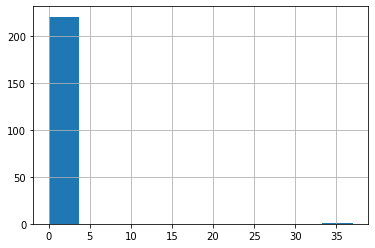

In [59]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count